In [11]:
import pickle 
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imghdr
import pandas as pd

from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image

from livelossplot import PlotLossesKerasTF
from tensorflow.keras.callbacks import TensorBoard

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


# Loading processed batched data

In [6]:
train = tf.data.Dataset.load("train_ds")
val = tf.data.Dataset.load("val_ds")
#test = tf.data.Dataset.load("test_ds")

# Build model 

In [8]:
#Hyperparameters

lr = 0.05 #learning rate
opt = Adam(learning_rate=lr)


In [9]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(32,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(128,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(128,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))


model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        5

# Training model

In [13]:
epochs = 2
model_file_name = "model_weights.h5"

checkpoint = ModelCheckpoint(model_file_name, monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.001, mode='auto')


log_file_name = 'fer_mod1'
tensorboard = TensorBoard(log_dir = "logs\\{}".format(log_file_name))

callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr, tensorboard]

#To launch Tensorboard
#Go to the current directory cd Desktop/folder
#python -m tensorboard.main --logdir=logs/ 


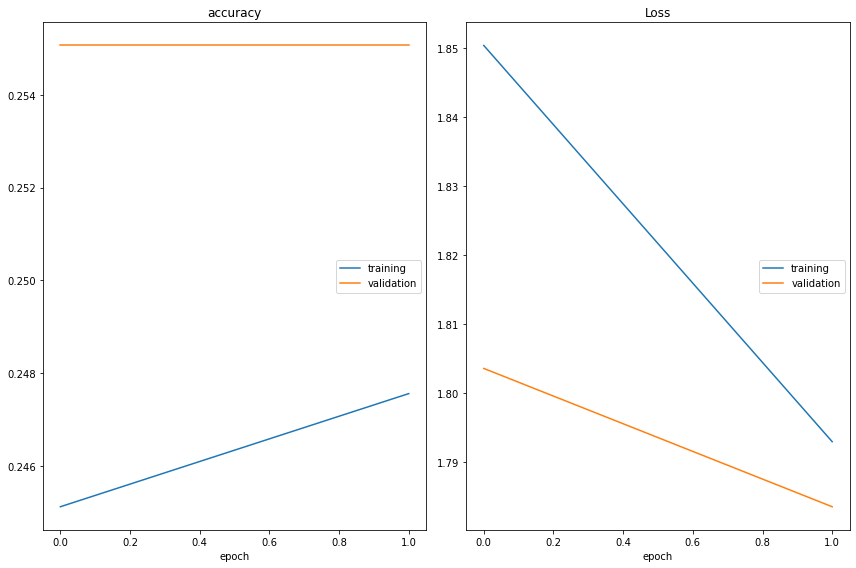

accuracy
	training         	 (min:    0.245, max:    0.248, cur:    0.248)
	validation       	 (min:    0.255, max:    0.255, cur:    0.255)
Loss
	training         	 (min:    1.793, max:    1.850, cur:    1.793)
	validation       	 (min:    1.784, max:    1.804, cur:    1.784)

Epoch 2: saving model to model_weights.h5
718/718 [==============================] - 151s 211ms/step - loss: 1.7930 - accuracy: 0.2476 - val_loss: 1.7836 - val_accuracy: 0.2551 - lr: 0.0500


In [14]:
hist = model.fit(train, 
                 epochs=epochs, 
                 validation_data=val,
                callbacks = callbacks)

# Saving model architecture

In [21]:
model_structure = model.to_json()
with open("model_structure.json", "w") as json_file:
    json_file.write(model_structure)
    
#model.save_weights("model.h5") #Weights are already saved during training, but just in case